# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


Every colum in a data frame is a Series

In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
#it returns a series
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)
#operations are label wise

a   -0.251538
b    0.863323
c    0.315332
d   -0.196989
e   -0.457639
dtype: float64
a         NaN
b    1.726645
c    0.630664
d   -0.393979
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2023-11-22
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023-11-22 11:44:53',
               '2023-11-22 11:44:54', '2023-11-22 11:44:55',
               '2023-11-22 11:44:56', '2023-11-22 11:44:57',
               '2023-11-22 11:44:58', '2023-11-22 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time


2023-11-22 10:45:00     9.895087
2023-11-23 10:45:00    11.359738
2023-11-24 10:45:00     9.894988
2023-11-25 10:45:00     9.997126
Freq: D, dtype: float64 

2023-11-22 10:45:00     9.895087
2023-11-23 10:45:00    11.359738
2023-11-24 10:45:00     9.894988
2023-11-25 10:45:00     9.997126
2023-11-26 10:45:00    12.149543
2023-11-27 10:45:00     9.670123
2023-11-28 10:45:00     9.227518
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2023-11-22 10:45:00,-0.512205,1.948187,-0.046010,0.259138
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,0.947889
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,2.125485
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,0.109368
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,0.167346
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,0.569264
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,-0.518560
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,-0.645830
2023-11-22 18:45:00,0.262171,0.410446,0.121450,-0.140959
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,-0.457765


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2)

,A,B,C,D
2023-11-22 10:45:00,-0.512205,1.948187,-0.046010,0.259138
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,0.947889


In [13]:
df.tail(4)

,A,B,C,D
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,-0.518560
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,-0.645830
2023-11-22 18:45:00,0.262171,0.410446,0.121450,-0.140959
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,-0.457765


In [14]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.51220485,  1.94818715, -0.04601028,  0.25913822],
       [-0.46606959, -0.14933642,  0.29436765,  0.94788909],
       [-0.54887448,  1.07141004,  1.43231891,  2.12548494],
       [-0.27223221,  0.02565408,  2.18141143,  0.10936822],
       [-1.05193854,  2.80258714, -0.05341157,  0.1673463 ],
       [-1.51455517,  0.27258559,  0.41689716,  0.56926443],
       [-0.10822241, -0.36432041,  0.69498375, -0.51856014],
       [ 1.05860987, -0.8870315 , -1.71019307, -0.64582975],
       [ 0.2621708 ,  0.41044587,  0.12144993, -0.1409586 ],
       [ 0.48499259,  1.37885071, -0.03086278, -0.4577653 ]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.266832,0.650903,0.330095,0.241538
std,0.743843,1.137620,1.022489,0.828612
min,-1.514555,-0.887032,-1.710193,-0.645830
25%,-0.539707,-0.105589,-0.042223,-0.378564
50%,-0.369151,0.341516,0.207909,0.138357
75%,0.169572,1.301991,0.625462,0.491733
max,1.058610,2.802587,2.181411,2.125485


In [18]:
df.T

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,-0.512205,-0.466070,-0.548874,-0.272232,-1.051939,-1.514555,-0.108222,1.058610,0.262171,0.484993
B,1.948187,-0.149336,1.071410,0.025654,2.802587,0.272586,-0.364320,-0.887032,0.410446,1.378851
C,-0.046010,0.294368,1.432319,2.181411,-0.053412,0.416897,0.694984,-1.710193,0.121450,-0.030863
D,0.259138,0.947889,2.125485,0.109368,0.167346,0.569264,-0.518560,-0.645830,-0.140959,-0.457765


In [19]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,-0.457765
2023-11-22 18:45:00,0.262171,0.410446,0.121450,-0.140959
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,-0.645830
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,-0.518560
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,0.569264
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,0.167346
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,0.109368
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,2.125485
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,0.947889
2023-11-22 10:45:00,-0.512205,1.948187,-0.046010,0.259138


In [20]:
df.sort_values(by="C")

,A,B,C,D
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,-0.645830
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,0.167346
2023-11-22 10:45:00,-0.512205,1.948187,-0.046010,0.259138
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,-0.457765
2023-11-22 18:45:00,0.262171,0.410446,0.121450,-0.140959
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,0.947889
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,0.569264
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,-0.518560
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,2.125485
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,0.109368


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2023-11-22 10:45:00   -0.512205
2023-11-22 11:45:00   -0.466070
2023-11-22 12:45:00   -0.548874
2023-11-22 13:45:00   -0.272232
2023-11-22 14:45:00   -1.051939
2023-11-22 15:45:00   -1.514555
2023-11-22 16:45:00   -0.108222
2023-11-22 17:45:00    1.058610
2023-11-22 18:45:00    0.262171
2023-11-22 19:45:00    0.484993
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00   -0.512205
2023-11-22 11:45:00   -0.466070
2023-11-22 12:45:00   -0.548874
2023-11-22 13:45:00   -0.272232
2023-11-22 14:45:00   -1.051939
2023-11-22 15:45:00   -1.514555
2023-11-22 16:45:00   -0.108222
2023-11-22 17:45:00    1.058610
2023-11-22 18:45:00    0.262171
2023-11-22 19:45:00    0.484993
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00 -0.512205  1.948187 -0.046010  0.259138
2023-11-22 11:45:00 -0.466070 -0.149336  0.294368  0.947889
2023-11-22 12:45:00 -0.548874  1.071410  1.432319  2.125485
                            A         B         C         D
2023-11-22 10:45:00 -0.512205  1.948187 -0.046010  0.259138
2023-11-22 11:45:00 -0.466070 -0.149336  0.294368  0.947889
2023-11-22 12:45:00 -0.548874  1.071410  1.432319  2.125485


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.512205
B    1.948187
C   -0.046010
D    0.259138
Name: 2023-11-22 10:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,-0.512205,1.948187
2023-11-22 11:45:00,-0.466070,-0.149336
2023-11-22 12:45:00,-0.548874,1.071410
2023-11-22 13:45:00,-0.272232,0.025654
2023-11-22 14:45:00,-1.051939,2.802587
2023-11-22 15:45:00,-1.514555,0.272586
2023-11-22 16:45:00,-0.108222,-0.364320
2023-11-22 17:45:00,1.058610,-0.887032
2023-11-22 18:45:00,0.262171,0.410446
2023-11-22 19:45:00,0.484993,1.378851


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,-1.051939,2.802587
2023-11-22 15:45:00,-1.514555,0.272586
2023-11-22 16:45:00,-0.108222,-0.364320


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.46606958548057537
-0.46606958548057537


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.272232
B    0.025654
C    2.181411
D    0.109368
Name: 2023-11-22 13:45:00, dtype: float64 

                            A         B
2023-11-22 13:45:00 -0.272232  0.025654
2023-11-22 14:45:00 -1.051939  2.802587


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,-0.466070,0.294368
2023-11-22 12:45:00,-0.548874,1.432319
2023-11-22 14:45:00,-1.051939,-0.053412


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00 -0.466070 -0.149336  0.294368  0.947889
2023-11-22 12:45:00 -0.548874  1.071410  1.432319  2.125485 

                            B         C
2023-11-22 10:45:00  1.948187 -0.046010
2023-11-22 11:45:00 -0.149336  0.294368
2023-11-22 12:45:00  1.071410  1.432319
2023-11-22 13:45:00  0.025654  2.181411
2023-11-22 14:45:00  2.802587 -0.053412
2023-11-22 15:45:00  0.272586  0.416897
2023-11-22 16:45:00 -0.364320  0.694984
2023-11-22 17:45:00 -0.887032 -1.710193
2023-11-22 18:45:00  0.410446  0.121450
2023-11-22 19:45:00  1.378851 -0.030863


In [30]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


-0.1493364216273856

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 10:45:00,-0.512205,1.948187,-0.046010,0.259138
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,2.125485
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,0.109368
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,0.167346
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,0.569264
2023-11-22 18:45:00,0.262171,0.410446,0.121450,-0.140959
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,-0.457765


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2023-11-22 10:45:00,NaN,1.948187,NaN,0.259138
2023-11-22 11:45:00,NaN,NaN,0.294368,0.947889
2023-11-22 12:45:00,NaN,1.071410,1.432319,2.125485
2023-11-22 13:45:00,NaN,0.025654,2.181411,0.109368
2023-11-22 14:45:00,NaN,2.802587,NaN,0.167346
2023-11-22 15:45:00,NaN,0.272586,0.416897,0.569264
2023-11-22 16:45:00,NaN,NaN,0.694984,NaN
2023-11-22 17:45:00,1.058610,NaN,NaN,NaN
2023-11-22 18:45:00,0.262171,0.410446,0.121450,NaN
2023-11-22 19:45:00,0.484993,1.378851,NaN,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


/tmp/ipykernel_2933/2488593994.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'D'] = np.array([5] * len(df))


In [34]:
df

,A,B,C,D,E,E prime
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,0
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,5,0.5,2
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,5,1.0,4
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,5,1.5,6
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,5,2.0,8
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,5,2.5,10
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,5,3.0,12
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,5,3.5,14
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,5,4.5,18


In [38]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,0,1.000000
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,5,1.0,4,0.999848
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,5,2.0,8,0.999391
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,5,2.5,10,0.999048
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,5,3.0,12,0.998630
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,5,3.5,14,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16,0.997564
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()

#this code practice is bad, should be avoided
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-1.948187,-0.046010,-5,0.0,0,-1.000000
2023-11-22 11:45:00,-0.466070,-0.149336,-0.294368,-5,-0.5,-2,-0.999962
2023-11-22 12:45:00,-0.548874,-1.071410,-1.432319,-5,-1.0,-4,-0.999848
2023-11-22 13:45:00,-0.272232,-0.025654,-2.181411,-5,-1.5,-6,-0.999657
2023-11-22 14:45:00,-1.051939,-2.802587,-0.053412,-5,-2.0,-8,-0.999391
2023-11-22 15:45:00,-1.514555,-0.272586,-0.416897,-5,-2.5,-10,-0.999048
2023-11-22 16:45:00,-0.108222,-0.364320,-0.694984,-5,-3.0,-12,-0.998630
2023-11-22 17:45:00,-1.058610,-0.887032,-1.710193,-5,-3.5,-14,-0.998135
2023-11-22 18:45:00,-0.262171,-0.410446,-0.121450,-5,-4.0,-16,-0.997564
2023-11-22 19:45:00,-0.484993,-1.378851,-0.030863,-5,-4.5,-18,-0.996917


In [37]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,0,1.000000
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,5,1.0,4,0.999848
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,5,2.0,8,0.999391
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,5,2.5,10,0.999048
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,5,3.0,12,0.998630
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,5,3.5,14,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16,0.997564
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [39]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,1.000000
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,5,0.5,0.999962
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,5,1.0,0.999848
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,5,1.5,0.999657
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,5,2.0,0.999391
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,5,2.5,0.999048
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,5,3.0,0.998630
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,5,3.5,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,0.997564
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,5,4.5,0.996917


In [40]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,0,1.000000
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,5,2.5,10,0.999048
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,5,3.0,12,0.998630
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,5,3.5,14,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16,0.997564
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,5,4.5,18,0.996917


In [41]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,0,1.000000
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,5,1.0,4,0.999848
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,5,2.0,8,0.999391
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,5,2.5,10,0.999048
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,5,3.0,12,0.998630
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,5,3.5,14,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16,0.997564
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,5,4.5,18,0.996917


In [42]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,0,1.000000
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,5,1.0,4,0.999848
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,5,2.0,8,0.999391
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,5,2.5,10,0.999048
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,5,3.0,12,0.998630
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,5,3.5,14,0.998135
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [43]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,1.948187,NaN,5,NaN,NaN,1.000000
2023-11-22 11:45:00,NaN,NaN,0.294368,5,0.5,2.0,0.999962
2023-11-22 12:45:00,NaN,1.071410,1.432319,5,1.0,4.0,0.999848
2023-11-22 13:45:00,NaN,0.025654,2.181411,5,1.5,6.0,0.999657
2023-11-22 14:45:00,NaN,2.802587,NaN,5,2.0,8.0,0.999391
2023-11-22 15:45:00,NaN,0.272586,0.416897,5,2.5,10.0,0.999048
2023-11-22 16:45:00,NaN,NaN,0.694984,5,3.0,12.0,0.998630
2023-11-22 17:45:00,1.058610,NaN,NaN,5,3.5,14.0,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16.0,0.997564
2023-11-22 19:45:00,0.484993,1.378851,NaN,5,4.5,18.0,0.996917


In [44]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2023-11-22 18:45:00,0.262171,0.410446,0.12145,5,4.0,16.0,0.997564


In [45]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,False,True,False,True,True,False
2023-11-22 11:45:00,True,True,False,False,False,False,False
2023-11-22 12:45:00,True,False,False,False,False,False,False
2023-11-22 13:45:00,True,False,False,False,False,False,False
2023-11-22 14:45:00,True,False,True,False,False,False,False
2023-11-22 15:45:00,True,False,False,False,False,False,False
2023-11-22 16:45:00,True,True,False,False,False,False,False
2023-11-22 17:45:00,False,True,True,False,False,False,False
2023-11-22 18:45:00,False,False,False,False,False,False,False
2023-11-22 19:45:00,False,False,True,False,False,False,False


In [46]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,1.948187,0.000000,5,0.0,0.0,1.000000
2023-11-22 11:45:00,0.000000,0.000000,0.294368,5,0.5,2.0,0.999962
2023-11-22 12:45:00,0.000000,1.071410,1.432319,5,1.0,4.0,0.999848
2023-11-22 13:45:00,0.000000,0.025654,2.181411,5,1.5,6.0,0.999657
2023-11-22 14:45:00,0.000000,2.802587,0.000000,5,2.0,8.0,0.999391
2023-11-22 15:45:00,0.000000,0.272586,0.416897,5,2.5,10.0,0.999048
2023-11-22 16:45:00,0.000000,0.000000,0.694984,5,3.0,12.0,0.998630
2023-11-22 17:45:00,1.058610,0.000000,0.000000,5,3.5,14.0,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16.0,0.997564
2023-11-22 19:45:00,0.484993,1.378851,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [47]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,1.948187,NaN,5,NaN,NaN,1.000000
2023-11-22 11:45:00,NaN,1.948187,0.294368,5,0.5,2.0,0.999962
2023-11-22 12:45:00,NaN,1.071410,1.432319,5,1.0,4.0,0.999848
2023-11-22 13:45:00,NaN,0.025654,2.181411,5,1.5,6.0,0.999657
2023-11-22 14:45:00,NaN,2.802587,2.181411,5,2.0,8.0,0.999391
2023-11-22 15:45:00,NaN,0.272586,0.416897,5,2.5,10.0,0.999048
2023-11-22 16:45:00,NaN,0.272586,0.694984,5,3.0,12.0,0.998630
2023-11-22 17:45:00,1.058610,0.272586,0.694984,5,3.5,14.0,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16.0,0.997564
2023-11-22 19:45:00,0.484993,1.378851,0.121450,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [48]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.215612
B          0.650903
C          0.330095
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2023-11-22 10:45:00    1.128882
2023-11-22 11:45:00    1.168418
2023-11-22 12:45:00    1.850672
2023-11-22 13:45:00    2.204927
2023-11-22 14:45:00    2.528090
2023-11-22 15:45:00    2.524854
2023-11-22 16:45:00    3.031581
2023-11-22 17:45:00    3.137074
2023-11-22 18:45:00    3.827376
2023-11-22 19:45:00    4.332843
Freq: H, dtype: float64 



In [49]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,0,1.000000
2023-11-22 11:45:00,-0.466070,1.798851,0.248357,10,0.5,2,1.999962
2023-11-22 12:45:00,-1.014944,2.870261,1.680676,15,1.5,6,2.999810
2023-11-22 13:45:00,-1.287176,2.895915,3.862088,20,3.0,12,3.999467
2023-11-22 14:45:00,-2.339115,5.698502,3.808676,25,5.0,20,4.998858
2023-11-22 15:45:00,-3.853670,5.971088,4.225573,30,7.5,30,5.997906
2023-11-22 16:45:00,-3.961892,5.606767,4.920557,35,10.5,42,6.996536
2023-11-22 17:45:00,-2.903283,4.719736,3.210364,40,14.0,56,7.994670
2023-11-22 18:45:00,-2.641112,5.130182,3.331814,45,18.0,72,8.992234
2023-11-22 19:45:00,-2.156119,6.509032,3.300951,50,22.5,90,9.989152


In [50]:
#the original object is left untouched
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,1.948187,-0.046010,5,0.0,0,1.000000
2023-11-22 11:45:00,-0.466070,-0.149336,0.294368,5,0.5,2,0.999962
2023-11-22 12:45:00,-0.548874,1.071410,1.432319,5,1.0,4,0.999848
2023-11-22 13:45:00,-0.272232,0.025654,2.181411,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.051939,2.802587,-0.053412,5,2.0,8,0.999391
2023-11-22 15:45:00,-1.514555,0.272586,0.416897,5,2.5,10,0.999048
2023-11-22 16:45:00,-0.108222,-0.364320,0.694984,5,3.0,12,0.998630
2023-11-22 17:45:00,1.058610,-0.887032,-1.710193,5,3.5,14,0.998135
2023-11-22 18:45:00,0.262171,0.410446,0.121450,5,4.0,16,0.997564
2023-11-22 19:45:00,0.484993,1.378851,-0.030863,5,4.5,18,0.996917


In [51]:
df.apply(lambda x: x.max() - x.min())

A           2.573165
B           3.689619
C           3.891605
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [52]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00    1.948187
2023-11-22 11:45:00   -0.615406
2023-11-22 12:45:00    0.522536
2023-11-22 13:45:00   -0.246578
2023-11-22 14:45:00    1.750649
2023-11-22 15:45:00   -1.241970
2023-11-22 16:45:00   -0.472543
2023-11-22 17:45:00    0.171578
2023-11-22 18:45:00    0.672617
2023-11-22 19:45:00    1.863843
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [53]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [54]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [55]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [56]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

KeyboardInterrupt: 

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [57]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.033512,-0.941722,-0.630094,-0.758073
1,0.123449,0.378827,-1.834569,-0.001659
2,-0.816297,0.033096,-0.701011,0.037715
3,-0.427417,0.575704,-0.080902,-0.481023
4,0.390184,0.128875,-2.092826,-0.342556
5,-0.430494,0.095324,-0.084120,-1.145879
6,0.772224,0.722993,0.097933,0.526583
7,-1.147608,1.147551,2.451274,0.098655
8,0.033225,-1.489437,1.650410,1.208943
9,-1.850128,-1.321892,-0.055024,-0.957937


In [58]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.033512 -0.941722 -0.630094 -0.758073
 1  0.123449  0.378827 -1.834569 -0.001659
 2 -0.816297  0.033096 -0.701011  0.037715,
           0         1         2         3
 3 -0.427417  0.575704 -0.080902 -0.481023
 4  0.390184  0.128875 -2.092826 -0.342556
 5 -0.430494  0.095324 -0.084120 -1.145879
 6  0.772224  0.722993  0.097933  0.526583,
           0         1         2         3
 7 -1.147608  1.147551  2.451274  0.098655
 8  0.033225 -1.489437  1.650410  1.208943
 9 -1.850128 -1.321892 -0.055024 -0.957937]

In [59]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.033512,-0.941722,-0.630094,-0.758073
1,0.123449,0.378827,-1.834569,-0.001659
2,-0.816297,0.033096,-0.701011,0.037715
3,-0.427417,0.575704,-0.080902,-0.481023
4,0.390184,0.128875,-2.092826,-0.342556
5,-0.430494,0.095324,-0.084120,-1.145879
6,0.772224,0.722993,0.097933,0.526583
7,-1.147608,1.147551,2.451274,0.098655
8,0.033225,-1.489437,1.650410,1.208943
9,-1.850128,-1.321892,-0.055024,-0.957937


In [60]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,-0.033512,-0.941722,-0.630094,-0.758073
1,0.123449,0.378827,-1.834569,-0.001659
2,-0.816297,0.033096,-0.701011,0.037715
3,-0.427417,0.575704,-0.080902,-0.481023
4,0.390184,0.128875,-2.092826,-0.342556
5,-0.430494,0.095324,-0.084120,-1.145879
6,0.772224,0.722993,0.097933,0.526583
7,-1.147608,1.147551,2.451274,0.098655
8,0.033225,-1.489437,1.650410,1.208943
9,-1.850128,-1.321892,-0.055024,-0.957937


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [61]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [62]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.393158,0.387041
1,bar,one,-0.174864,-0.039863
2,foo,two,-0.721577,0.054754
3,bar,three,0.012887,0.166183
4,foo,two,1.401049,-0.340571
5,bar,two,-0.028940,-2.114337
6,foo,one,-0.305133,-0.840387
7,foo,three,0.456886,0.587809


In [63]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

/tmp/ipykernel_2933/2296005771.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby('A').sum()


,C,D
A,,
bar,-0.190917,-1.988016
foo,1.224382,-0.151355


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [64]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -2.096308
       two      -0.024814
baz    one       0.020249
       two      -0.025819
foo    one       0.133473
       two      -0.075464
qux    one       1.632873
       two      -1.849708
dtype: float64


In [65]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.174864 -0.039863
    three  0.012887  0.166183
    two   -0.028940 -2.114337
foo one    0.088025 -0.453346
    three  0.456886  0.587809
    two    0.679472 -0.285818

In [66]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.174864
            D   -0.039863
     three  C    0.012887
            D    0.166183
     two    C   -0.028940
            D   -2.114337
foo  one    C    0.088025
            D   -0.453346
     three  C    0.456886
            D    0.587809
     two    C    0.679472
            D   -0.285818
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

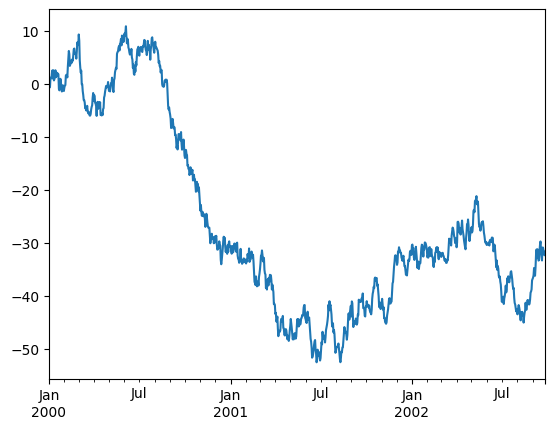

In [67]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

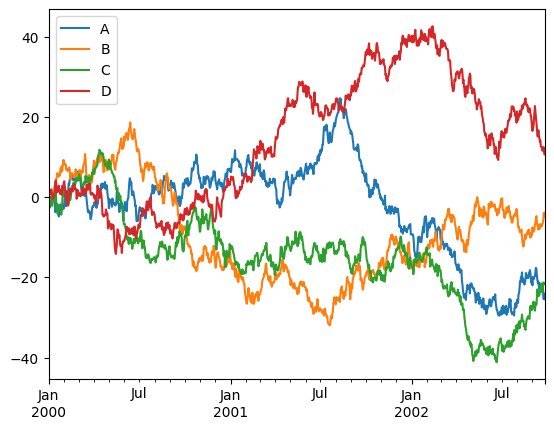

In [68]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')